In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Download only the training subset of the 20 Newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# Print the number of data points in the training dataset
print(f"Number of data points in the training dataset: {len(newsgroups_train.data)}")

# Get unique classes (target names)
class_labels = newsgroups_train.target_names

print(class_labels)

# Create a dictionary to store one sample text from each class
sample_texts = {}

# Loop over each class and get one sample text
for label_index, label in enumerate(class_labels):
    # Find the first sample in the dataset that belongs to the current class
    for i, target in enumerate(newsgroups_train.target):
        if target == label_index:
            sample_texts[label] = newsgroups_train.data[i]
            break

# Print class labels and sample text
for label, sample in sample_texts.items():
    print(f"Class Label: {label}")
    print("Sample Text:")
    print(sample[:500])  # Print the first 500 characters of the sample
    print("-" * 80)

In [6]:
from sklearn.datasets import fetch_20newsgroups

# Download the training subset of the 20 Newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# Print the number of data points in the training dataset
print(f"Number of data points in the training dataset: {len(newsgroups_train.data)}")

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Download the training dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# Preprocess the data using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the validation set
y_pred = clf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Number of data points in the training dataset: 11314
Validation Accuracy: 0.8833


In [23]:
def create_binary_targets(dataset):
    """
    Remaps the 20 newsgroups targets into two binary classes based on the assignment.
    
    Class 1 (Tech & Science) -> 0
    Class 2 (Others)         -> 1
    
    Args:
        dataset: The loaded scikit-learn newsgroups dataset object.
        
    Returns:
        A NumPy array of binary labels (0 or 1).
    """
    
    # Define the groupings from the assignment
    class_1_names = {
        'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
        'comp.sys.mac.hardware', 'comp.windows.x', 'sci.crypt', 'sci.electronics',
        'sci.med', 'sci.space'
    }

    # Get the list of 20 string names
    original_target_names = dataset.target_names
    # Get the list of 11,314 numbers (0-19)
    original_indices = dataset.target

    # Create an empty list to store our new binary (0 or 1) labels
    y_binary_list = []

    # Loop through every single index (0-19) in the original dataset
    for index in original_indices:
        # Get the actual string name for that document's index
        class_name = original_target_names[index]
        
        # Now, we compare the string name directly
        if class_name in class_1_names:
            # It's a Tech/Science class, so we append 0
            y_binary_list.append(0)
        else:
            # It's any other class, so we append 1
            y_binary_list.append(1)

    # Convert our Python list into a NumPy array
    return np.array(y_binary_list)

## Model Selection and Final Choice

After evaluating several classification models, including:
* Logistic Regression
* Random Forest
* Multinomial Naive Bayes
* K-Nearest Neighbors

The **Support Vector Machine (SVM)** achieved the highest performance on the validation set. It was the clear winner and has been selected as the best-performing model for this task.

The code cell immediately below contains the full implementation and evaluation (including Confusion Matrix and ROC Curve) for the **Support Vector Machine (LinearSVC)** model.

--------------------- Support Vector Machine (LinearSVC) ---------------------------


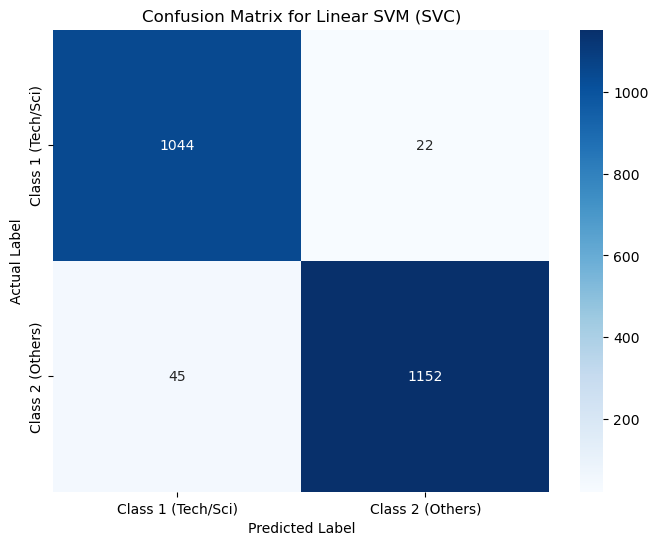

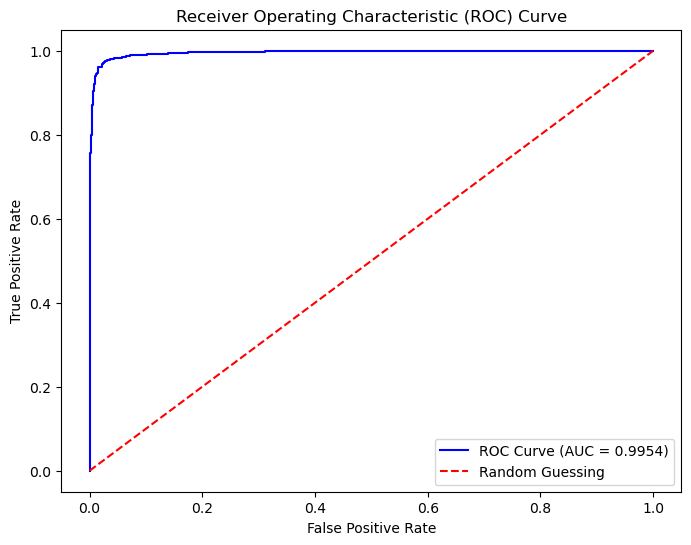


Area Under the Curve (AUC): 0.9954
Validation Accuracy: 0.9704

                    precision    recall  f1-score   support

Class 1 (Tech/Sci)       0.96      0.98      0.97      1066
  Class 2 (Others)       0.98      0.96      0.97      1197

          accuracy                           0.97      2263
         macro avg       0.97      0.97      0.97      2263
      weighted avg       0.97      0.97      0.97      2263



In [41]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

print("--------------------- Support Vector Machine (LinearSVC) ---------------------------")

# 1. Download the training dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# 2. Create the binary labels by calling "create_binary_targets" helper function
y_binary = create_binary_targets(newsgroups_train)

# 3. Preprocess the data using TF-IDF vectorizer
# We use the original text data
X = newsgroups_train.data
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# 4. Split the data into training and validation sets
# We use our new 'y_binary' as the target
X_train, X_val, y_train, y_val = train_test_split(X_vec, y_binary, test_size=0.2, random_state=72)

# 5. Train a LinearSVC classifier
clf_svm = LinearSVC(random_state=72, dual="auto") # (dual="auto" suppresses a warning)
clf_svm.fit(X_train, y_train)

# 6. Predict on the validation set
y_pred_svm = clf_svm.predict(X_val)

# 7. Generate and plot the Confusion Matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_svm)

# Define the class names
class_names = ['Class 1 (Tech/Sci)', 'Class 2 (Others)']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

# Add titles and labels
plt.title(f'Confusion Matrix for Linear SVM (SVC)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 8. Generate and plot the ROC Curve

# Get the decision function scores (not probabilities)
y_pred_scores = clf_svm.decision_function(X_val)

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_pred_scores)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_val, y_pred_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"\nArea Under the Curve (AUC): {auc:.4f}")

# 9. Calculate accuracy and other metrics
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"Validation Accuracy: {accuracy_svm:.4f}\n")

# 0 = Tech & Science, 1 = Sports/Politics/Misc
print(classification_report(y_val, y_pred_svm, target_names=['Class 1 (Tech/Sci)', 'Class 2 (Others)']))

## Evaluation of Other Models
Below are the complete implementations for the other models that were tested for comparison.

It includes:
* Multinomial Naive Bayes
* Logistic Regression
* Random Forest
* K-Nearest Neighbors

--------------------- Multinomial Naive Bayes ---------------------------


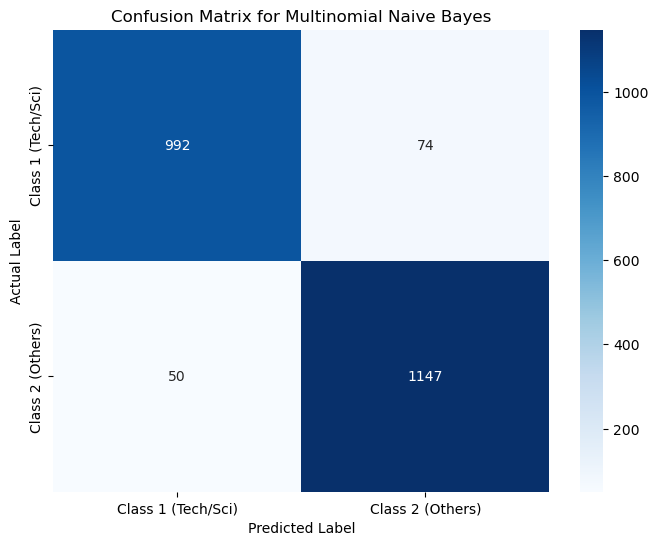

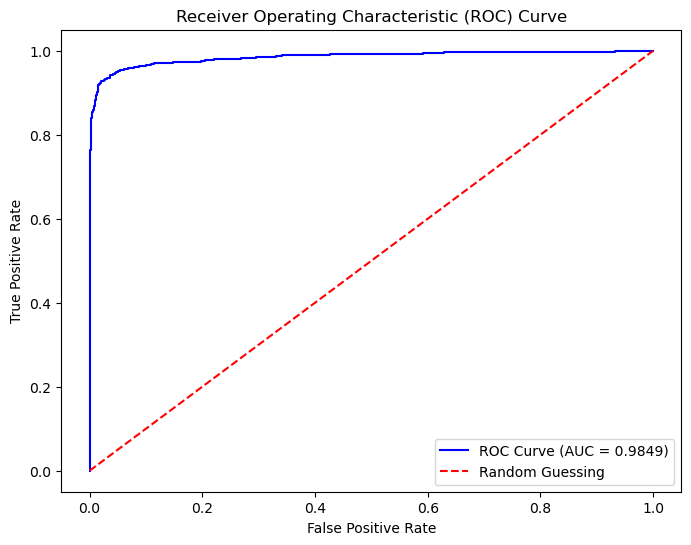


Area Under the Curve (AUC): 0.9849
Validation Accuracy: 0.9452

                    precision    recall  f1-score   support

Class 1 (Tech/Sci)       0.95      0.93      0.94      1066
  Class 2 (Others)       0.94      0.96      0.95      1197

          accuracy                           0.95      2263
         macro avg       0.95      0.94      0.94      2263
      weighted avg       0.95      0.95      0.95      2263



In [37]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

print("--------------------- Multinomial Naive Bayes ---------------------------")

# 1. Download the training dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# 2. Create the binary labels by calling "create_binary_targets" helper function
y_binary = create_binary_targets(newsgroups_train)

# 3. Preprocess the data using TF-IDF vectorizer
# We use the original text data
X = newsgroups_train.data
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# 4. Split the data into training and validation sets
# We use our new 'y_binary' as the target
X_train, X_val, y_train, y_val = train_test_split(X_vec, y_binary, test_size=0.2, random_state=72)

# 5. Train a Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

# 6. Predict on the validation set
y_pred_nb = clf_nb.predict(X_val)

# 7. Generate and plot the Confusion Matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_nb)

# Define the class names
class_names = ['Class 1 (Tech/Sci)', 'Class 2 (Others)']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

# Add titles and labels
plt.title(f'Confusion Matrix for Multinomial Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 8. Generate and plot the ROC Curve

# Get the probability scores for the "positive" class (Class 1, which is "Others")
# We need the probabilities for the class labeled '1'
y_pred_probs = clf_nb.predict_proba(X_val)[:, 1]

# Calculate the ROC curve points
# Note: your y_val has 0 (Tech) and 1 (Others).
# roc_curve expects 1 to be the "positive" class, which works perfectly here.
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_val, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"\nArea Under the Curve (AUC): {auc:.4f}")

# 9. Calculate accuracy and other metrics
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print(f"Validation Accuracy: {accuracy_nb:.4f}\n")

# 0 = Tech & Science, 1 = Sports/Politics/Misc
print(classification_report(y_val, y_pred_nb, target_names=['Class 1 (Tech/Sci)', 'Class 2 (Others)']))

--------------------- Logistic Regression ---------------------------


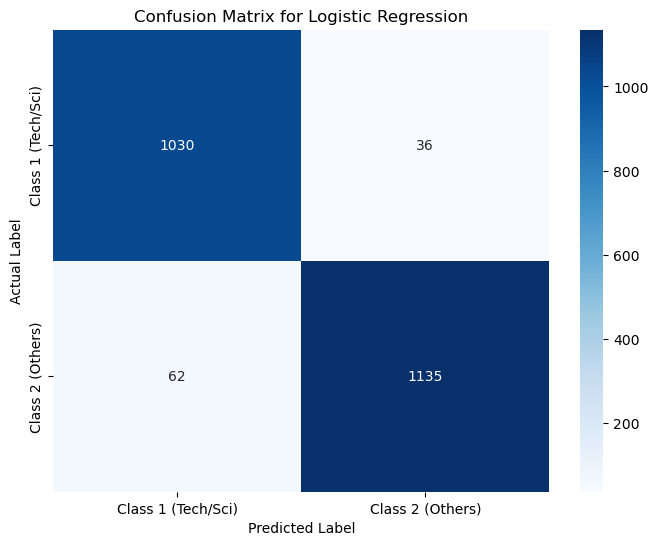

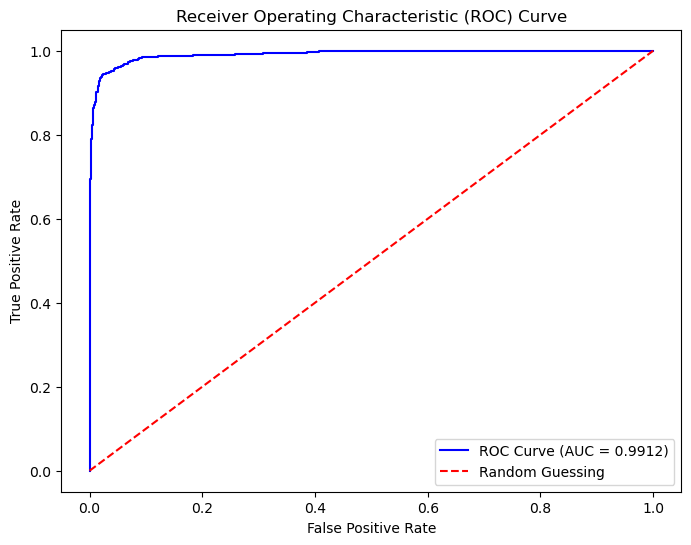


Area Under the Curve (AUC): 0.9912
Validation Accuracy: 0.9567

                    precision    recall  f1-score   support

Class 1 (Tech/Sci)       0.94      0.97      0.95      1066
  Class 2 (Others)       0.97      0.95      0.96      1197

          accuracy                           0.96      2263
         macro avg       0.96      0.96      0.96      2263
      weighted avg       0.96      0.96      0.96      2263



In [39]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

print("--------------------- Logistic Regression ---------------------------")

# 1. Download the training dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# 2. Create the binary labels by calling "create_binary_targets" helper function
y_binary = create_binary_targets(newsgroups_train)

# 3. Preprocess the data using TF-IDF vectorizer
# We use the original text data
X = newsgroups_train.data
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# 4. Split the data into training and validation sets
# We use our new 'y_binary' as the target
X_train, X_val, y_train, y_val = train_test_split(X_vec, y_binary, test_size=0.2, random_state=72)

# 5. Train a Logistic Regression classifier
# Added max_iter=1000 to help the model converge
clf_lr = LogisticRegression(random_state=72, max_iter=1000)
clf_lr.fit(X_train, y_train)

# 6. Predict on the validation set
y_pred_lr = clf_lr.predict(X_val) 

# 7. Generate and plot the Confusion Matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_lr)

# Define the class names
class_names = ['Class 1 (Tech/Sci)', 'Class 2 (Others)']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

# Add titles and labels
plt.title(f'Confusion Matrix for Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 8. Generate and plot the ROC Curve

# Get the probability scores for the "positive" class (Class 1, which is "Others")
# We need the probabilities for the class labeled '1'
y_pred_probs = clf_lr.predict_proba(X_val)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_val, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"\nArea Under the Curve (AUC): {auc:.4f}")

# 9. Calculate accuracy and other metrics
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Validation Accuracy: {accuracy_lr:.4f}\n")

# 0 = Tech & Science, 1 = Sports/Politics/Misc
print(classification_report(y_val, y_pred_lr, target_names=['Class 1 (Tech/Sci)', 'Class 2 (Others)']))

--------------------- Random Forest Classifier ---------------------------


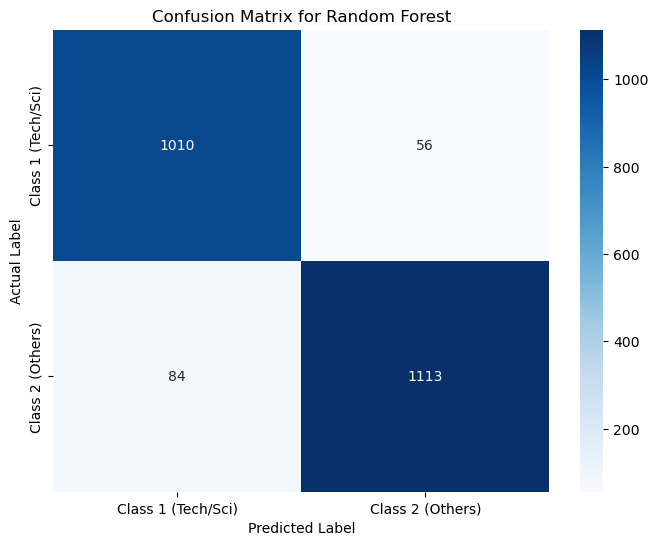

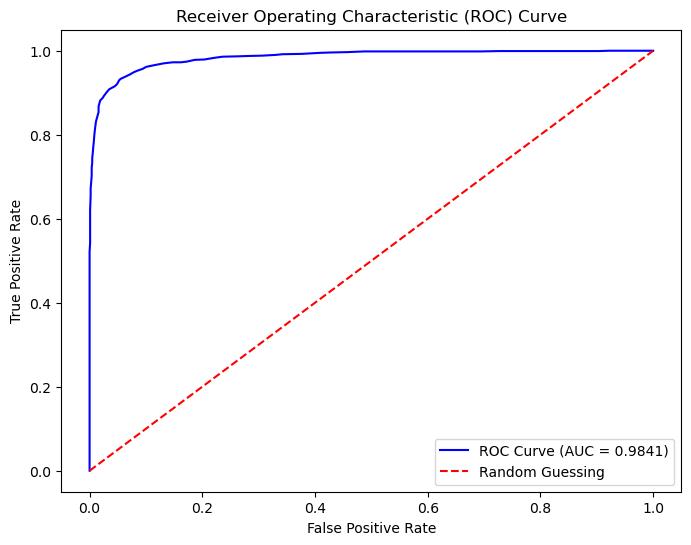


Area Under the... (AUC): 0.9841
Validation Accuracy: 0.9381

                    precision    recall  f1-score   support

Class 1 (Tech/Sci)       0.92      0.95      0.94      1066
  Class 2 (Others)       0.95      0.93      0.94      1197

          accuracy                           0.94      2263
         macro avg       0.94      0.94      0.94      2263
      weighted avg       0.94      0.94      0.94      2263



In [52]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

print("--------------------- Random Forest Classifier ---------------------------")

# 1. Download the training dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# 2. Create the binary labels by calling "create_binary_targets" helper function
y_binary = create_binary_targets(newsgroups_train)

# 3. Preprocess the data using TF-IDF vectorizer
# We use the original text data
X = newsgroups_train.data
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# 4. Split the data into training and validation sets
# We use our new 'y_binary' as the target
X_train, X_val, y_train, y_val = train_test_split(X_vec, y_binary, test_size=0.2, random_state=72)

# 5. Train a Random Forest classifier
# n_jobs=-1 uses all CPU cores to speed up training
clf_rf = RandomForestClassifier(random_state=72, n_jobs=-1)
clf_rf.fit(X_train, y_train)

# 6. Predict on the validation set
y_pred_rf = clf_rf.predict(X_val)

# 7. Generate and plot the Confusion Matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_rf)

# Define the class names
class_names = ['Class 1 (Tech/Sci)', 'Class 2 (Others)']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

# Add titles and labels
plt.title(f'Confusion Matrix for Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 8. Generate and plot the ROC Curve

# Get the probability scores (same as Logistic Regression)
y_pred_probs = clf_rf.predict_proba(X_val)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_val, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"\nArea Under the... (AUC): {auc:.4f}")

# 9. Calculate accuracy and other metrics
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Validation Accuracy: {accuracy_rf:.4f}\n")

# 0 = Tech & Science, 1 = Sports/Politics/Misc
print(classification_report(y_val, y_pred_rf, target_names=['Class 1 (Tech/Sci)', 'Class 2 (Others)']))

--------------------- K-Nearest Neighbors (KNN) ---------------------------


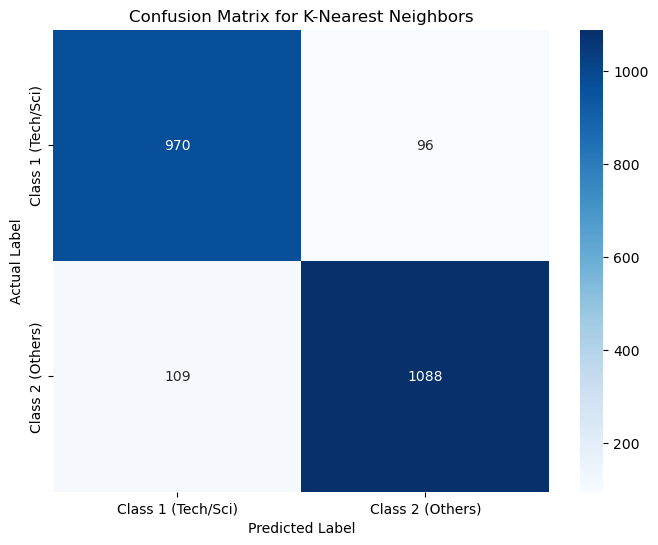

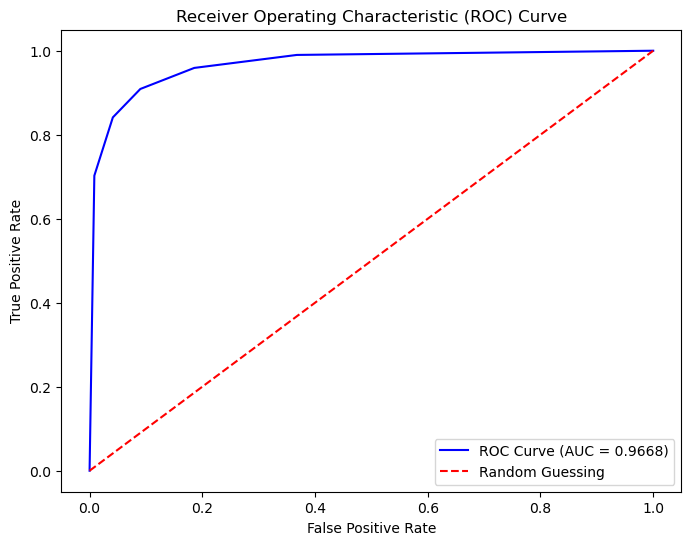


Area Under the Curve (AUC): 0.9668
Validation Accuracy: 0.9094

                    precision    recall  f1-score   support

Class 1 (Tech/Sci)       0.90      0.91      0.90      1066
  Class 2 (Others)       0.92      0.91      0.91      1197

          accuracy                           0.91      2263
         macro avg       0.91      0.91      0.91      2263
      weighted avg       0.91      0.91      0.91      2263



In [45]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

print("--------------------- K-Nearest Neighbors (KNN) ---------------------------")

# 1. Download the training dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# 2. Create the binary labels by calling "create_binary_targets" helper function
y_binary = create_binary_targets(newsgroups_train)

# 3. Preprocess the data using TF-IDF vectorizer
# We use the original text data
X = newsgroups_train.data
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# 4. Split the data into training and validation sets
# We use our new 'y_binary' as the target
X_train, X_val, y_train, y_val = train_test_split(X_vec, y_binary, test_size=0.2, random_state=72)

# 5. Train a KNN classifier
# n_jobs=-1 uses all CPU cores to speed up distance calculations
# We'll use the default of n_neighbors=5
clf_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
clf_knn.fit(X_train, y_train)

# 6. Predict on the validation set
y_pred_knn = clf_knn.predict(X_val)

# 7. Generate and plot the Confusion Matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_knn)

# Define the class names
class_names = ['Class 1 (Tech/Sci)', 'Class 2 (Others)']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

# Add titles and labels
plt.title(f'Confusion Matrix for K-Nearest Neighbors')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 8. Generate and plot the ROC Curve

# Get the probability scores
y_pred_probs = clf_knn.predict_proba(X_val)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_val, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"\nArea Under the Curve (AUC): {auc:.4f}")

# 9. Calculate accuracy and other metrics
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f"Validation Accuracy: {accuracy_knn:.4f}\n")

# 0 = Tech & Science, 1 = Sports/Politics/Misc
print(classification_report(y_val, y_pred_knn, target_names=['Class 1 (Tech/Sci)', 'Class 2 (Others)']))